In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *

In [2]:
def convert(s):
    s = s.replace(',', '.').replace(';', ',')
    data = map(float, s.split(','))
    return list(data)

def answer(*lst):
    ans = []
    for s in lst:
        ans.append(f"{s:.3f}")
    print('\n'.join(ans).replace('.', ','))

In [3]:
Z = norm()

def Phi0(x):
    return Z.cdf(x) - 1 / 2

# Проверка гипотез о значении среднего, 1

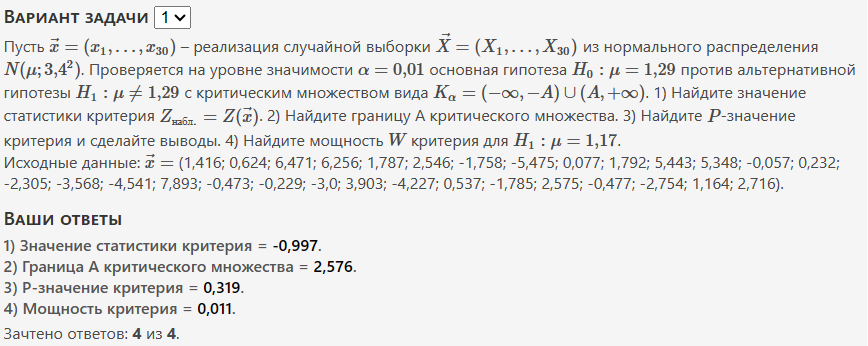

In [4]:
x = convert('1,416; 0,624; 6,471; 6,256; 1,787; 2,546; -1,758; -5,475; 0,077; 1,792; 5,443; 5,348; -0,057; 0,232; -2,305; -3,568; -4,541; 7,893; -0,473; -0,229; -3,0; 3,903; -4,227; 0,537; -1,785; 2,575; -0,477; -2,754; 1,164; 2,716')
x = np.array(x)
n = len(x)

s = 3.4
alpha = 0.01
mu0 = 1.29
mu1 = 1.17

# x = convert('0,189; -0,66; 0,218; -0,828; -0,65; 0,814; 2,846; 6,009; 1,634; -3,487; 1,606; -1,147; 0,615; 2,491; -1,091; 2,202; -1,503; 3,921; 2,095; -2,205; 3,671; -1,27; 6,15; 5,291; -2,73')
# x = np.array(x)
# n = len(x)

# s = 2.7
# alpha = 0.08
# mu0 = 1.22
# mu1 = 1.03

In [5]:
z = np.sqrt(n) * (x.mean() - mu0) / s
z

-0.9971235461091598

In [6]:
A = Z.isf(alpha / 2)
A

2.575829303548901

In [7]:
P = 2 * min(Z.cdf(z), Z.sf(z))
P

0.31870454518680236

In [8]:
beta = Phi0(A - np.sqrt(n) * (mu1 - mu0) / s) + Phi0(A + np.sqrt(n) * (mu1 - mu0) / s)
W = 1 - beta
W

0.011407601767124409

In [9]:
answer(z, A, P, W)

-0,997
2,576
0,319
0,011


# Проверка гипотез о значении среднего, 2

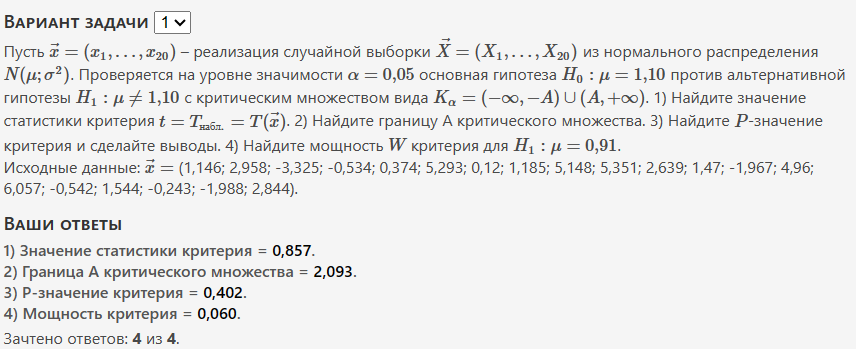

In [10]:
x = convert('1,146; 2,958; -3,325; -0,534; 0,374; 5,293; 0,12; 1,185; 5,148; 5,351; 2,639; 1,47; -1,967; 4,96; 6,057; -0,542; 1,544; -0,243; -1,988; 2,844')
x = np.array(x)
n = len(x)

alpha = 0.05
mu0 = 1.1
mu1 = 0.91

# x = convert('1,825; 0,35; 1,837; 2,528; -3,712; 6,468; 8,392; 0,079; 5,281; -2,019; 4,69; -0,607; 1,925; 2,688; 1,573; 4,66; 1,273; -0,505; 1,36; 0,403')
# x = np.array(x)
# n = len(x)

# alpha = 0.05
# mu0 = 1.54
# mu1 = 1.35

In [11]:
T = np.sqrt(n - 1) * (x.mean() - mu0) / x.std(ddof=0)
T

0.8568245565494966

In [12]:
A = t(n - 1).isf(alpha / 2)
A

2.0930240544082634

In [13]:
P = 2 * min(t(n - 1).cdf(T), t(n - 1).sf(T))
P

0.40221988280644494

In [14]:
delta = np.sqrt(n - 1) * (mu1 - mu0) / x.std()
t2 = t(n - 1).isf(alpha / 2)

beta = nct(n - 1, delta).cdf(t2) - nct(n - 1, delta).cdf(-t2)
W = 1 - beta
W

0.06002869580265269

In [15]:
answer(T, A, P, W)

0,857
2,093
0,402
0,060


# Проверка гипотез о значении дисперсии, 1

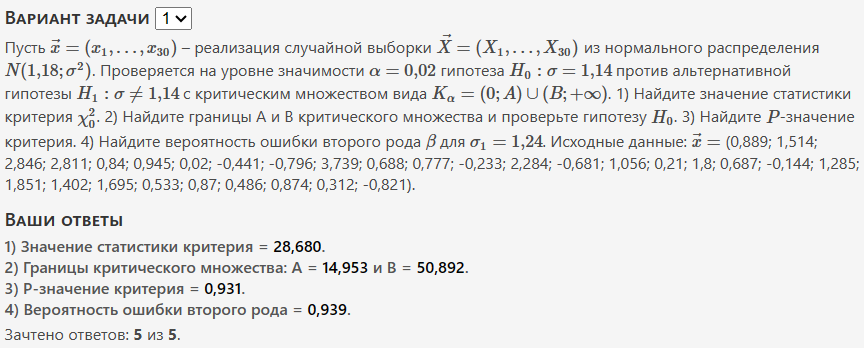

In [16]:
x = convert('0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821')
x = np.array(x)
n = len(x)

alpha = 0.02
mu = 1.18
s0 = 1.14
s1 = 1.24

# x = convert('0,185; 1,269; 2,034; 1,356; 2,498; -0,185; 1,665; 0,436; 0,226; 0,556; 0,858; 1,273; -0,107; 2,228; 1,736; -0,526; 2,892; 3,352; 2,542; 1,007; 0,0; 2,402; 0,754; 2,591; 1,445; 2,314; 1,613; 2,008; 1,222; 3,228; 1,353; 1,664; 3,338; -0,313; -0,226; 2,305; -0,116; 3,406; 0,743; 0,365; 3,383; 2,883; 3,32; 2,234; 0,237')
# x = np.array(x)
# n = len(x)

# alpha = 0.03
# mu = 1.83
# s0 = 1.13
# s1 = 1.23

In [17]:
s2 = np.sum((x - mu) ** 2) / n

CHI = n * s2 / s0 ** 2
CHI

28.6796999076639

In [18]:
A = chi2(n).isf(1 - alpha / 2)
B = chi2(n).isf(alpha / 2)
A, B

(14.953456528455447, 50.892181311517085)

In [19]:
P = 2 * min(chi2(n).cdf(CHI), chi2(n).sf(CHI))
P

0.931069638279688

In [20]:
beta = chi2(n).cdf(s0 ** 2 / s1 ** 2 * B) - chi2(n).cdf(s0 ** 2 / s1 ** 2 * A)
beta

0.9392983267568004

In [21]:
answer(CHI, A, B, P, beta)

28,680
14,953
50,892
0,931
0,939


# Проверка гипотез о значении дисперсии, 2

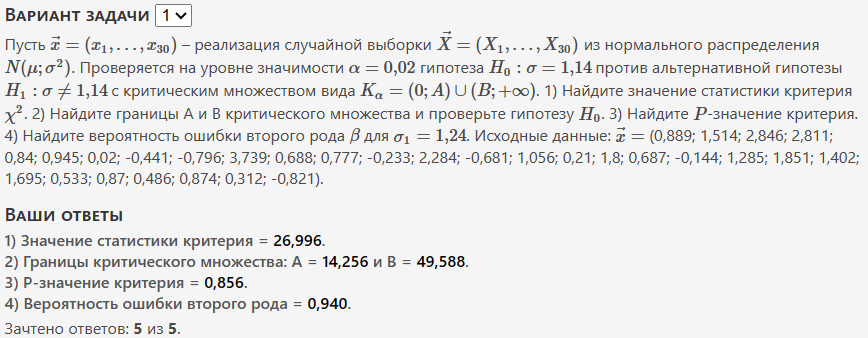

In [22]:
x = convert('0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821')
x = np.array(x)
n = len(x)

alpha = 0.02
s0 = 1.14
s1 = 1.24

# x = convert('0,185; 1,269; 2,034; 1,356; 2,498; -0,185; 1,665; 0,436; 0,226; 0,556; 0,858; 1,273; -0,107; 2,228; 1,736; -0,526; 2,892; 3,352; 2,542; 1,007; 0,0; 2,402; 0,754; 2,591; 1,445; 2,314; 1,613; 2,008; 1,222; 3,228; 1,353; 1,664; 3,338; -0,313; -0,226; 2,305; -0,116; 3,406; 0,743; 0,365; 3,383; 2,883; 3,32; 2,234; 0,237')
# x = np.array(x)
# n = len(x)

# alpha = 0.03
# s0 = 1.13
# s1 = 1.23

In [23]:
CHI = (n - 1) * x.var(ddof=1) / s0 ** 2
CHI

26.996043295372928

In [24]:
A = chi2(n - 1).isf(1 - alpha / 2)
B = chi2(n - 1).isf(alpha / 2)
A, B

(14.256454576274686, 49.58788447289881)

In [25]:
P = 2 * min(chi2(n - 1).cdf(CHI), chi2(n - 1).sf(CHI))
P

0.8561628289353819

In [26]:
beta = chi2(n - 1).cdf(s0 ** 2 / s1 ** 2 * B) - chi2(n - 1).cdf(s0 ** 2 / s1 ** 2 * A)
beta

0.9404557708620708

In [27]:
answer(CHI, A, B, P, beta)

26,996
14,256
49,588
0,856
0,940


# Проверка гипотез о равенстве двух средних

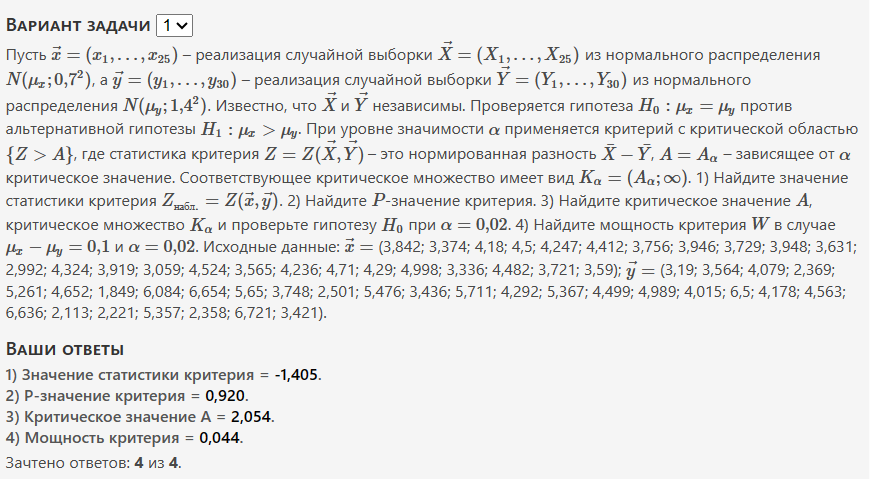

In [28]:
x = convert('3,842; 3,374; 4,18; 4,5; 4,247; 4,412; 3,756; 3,946; 3,729; 3,948; 3,631; 2,992; 4,324; 3,919; 3,059; 4,524; 3,565; 4,236; 4,71; 4,29; 4,998; 3,336; 4,482; 3,721; 3,59')
x = np.array(x)
n = len(x)

y = convert('3,19; 3,564; 4,079; 2,369; 5,261; 4,652; 1,849; 6,084; 6,654; 5,65; 3,748; 2,501; 5,476; 3,436; 5,711; 4,292; 5,367; 4,499; 4,989; 4,015; 6,5; 4,178; 4,563; 6,636; 2,113; 2,221; 5,357; 2,358; 6,721; 3,421')
y = np.array(y)
m = len(y)

sx = 0.7
sy = 1.4
alpha = 0.02
delta = 0.1

# x = convert('3,678; 5,51; 4,325; 3,44; 2,31; 4,599; 4,626; 3,856; 4,829; 4,744; 4,979; 4,45; 4,555; 3,471; 4,816; 4,896; 4,949; 2,365; 6,089; 4,712; 4,037; 6,414; 4,1; 5,978; 3,6')
# x = np.array(x)
# n = len(x)

# y = convert('4,408; 2,622; 3,441; 2,766; 4,557; 4,838; 5,857; 6,748; 5,228; 7,27; 6,333; 5,094; 3,159; 2,193; 3,544; 3,601; 2,277; 4,229; 1,945; 3,479; 3,093; 6,238; 4,554; 3,687; 6,656; 1,318; 5,147; 2,83; 3,289; 5,751; 6,041; 2,002; 4,852; 5,716; 3,801')
# y = np.array(y)
# m = len(y)

# sx = 1.1
# sy = 1.3
# alpha = 0.03
# delta = 0.7

In [29]:
z = (x.mean() - y.mean()) / np.sqrt(sx ** 2 / n + sy ** 2 / m)
z

-1.4046441651782242

In [30]:
P = Z.sf(z)
P

0.9199364416984964

In [31]:
A = Z.isf(alpha)
A

2.053748910631823

In [32]:
beta = 1 / 2 + Phi0(A - np.sqrt(m * n) / np.sqrt(m * sx ** 2 + n * sy ** 2) * delta)
W = 1 - beta
W

0.043575905243082746

In [33]:
answer(z, P, A, W)

-1,405
0,920
2,054
0,044


# Проверка гипотез о равенстве трёх средних

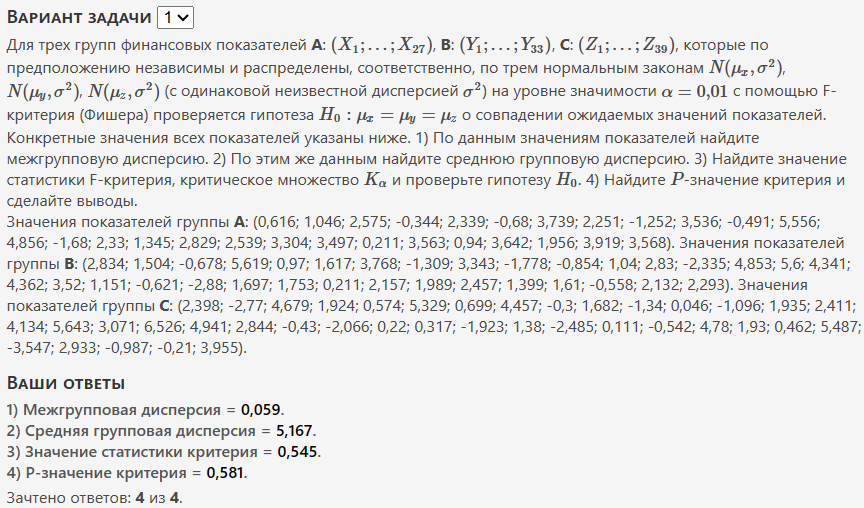

In [34]:
x = convert('0,616; 1,046; 2,575; -0,344; 2,339; -0,68; 3,739; 2,251; -1,252; 3,536; -0,491; 5,556; 4,856; -1,68; 2,33; 1,345; 2,829; 2,539; 3,304; 3,497; 0,211; 3,563; 0,94; 3,642; 1,956; 3,919; 3,568')
x = np.array(x)
n1 = len(x)

y = convert('2,834; 1,504; -0,678; 5,619; 0,97; 1,617; 3,768; -1,309; 3,343; -1,778; -0,854; 1,04; 2,83; -2,335; 4,853; 5,6; 4,341; 4,362; 3,52; 1,151; -0,621; -2,88; 1,697; 1,753; 0,211; 2,157; 1,989; 2,457; 1,399; 1,61; -0,558; 2,132; 2,293')
y = np.array(y)
n2 = len(y)

z = convert('2,398; -2,77; 4,679; 1,924; 0,574; 5,329; 0,699; 4,457; -0,3; 1,682; -1,34; 0,046; -1,096; 1,935; 2,411; 4,134; 5,643; 3,071; 6,526; 4,941; 2,844; -0,43; -2,066; 0,22; 0,317; -1,923; 1,38; -2,485; 0,111; -0,542; 4,78; 1,93; 0,462; 5,487; -3,547; 2,933; -0,987; -0,21; 3,955')
z = np.array(z)
n3 = len(z)

xyz = pd.DataFrame([x, y, z]).T
xyz_all = np.concatenate([x, y, z])
n = [n1, n2, n3]
N = sum(n)
k = 3

alpha = 0.01

# x = convert('3,956; 0,338; -0,582; 3,536; -0,028; 0,245; 0,807; 1,942; 1,05; -1,4; 0,355; -3,436; 3,401; -1,945; -0,751; 2,025; 0,125; 5,603; -1,203; 2,541; 1,806; -0,903; 3,156; 1,488; 3,752; 3,876; 7,092')
# x = np.array(x)
# n1 = len(x)

# y = convert('5,108; 1,014; 1,325; 4,539; 3,473; 3,436; -1,981; 1,842; 0,129; 2,572; 1,664; 4,084; 2,661; 3,787; 0,781; -0,367; 0,916; 1,859; 2,81; 7,322; 1,799; -0,394; 1,07; 0,787; 3,056; -1,798; 2,052; 2,276; 2,457; 0,466; 1,329; -1,518; 0,716')
# y = np.array(y)
# n2 = len(y)

# z = convert('0,597; 2,899; -0,875; 3,775; 5,487; -3,068; 2,923; 3,525; 0,37; 0,947; 1,581; 1,185; 1,158; -2,122; 4,666; 4,491; -0,052; -1,619; 3,151')
# z = np.array(z)
# n3 = len(z)

# xyz = pd.DataFrame([x, y, z]).T
# xyz_all = np.concatenate([x, y, z])
# n = [n1, n2, n3]
# N = sum(n)
# k = 3

# alpha = 0.03

In [35]:
d2 = np.sum((xyz.mean() - xyz_all.mean()) ** 2 * n) / N
d2

0.058691157652672854

In [36]:
meanvar = np.sum(xyz.var(ddof=0) * n) / N
meanvar

5.166856587271314

In [37]:
# проверка
(d2 + meanvar), xyz_all.var(ddof=0)

(5.225547744923987, 5.225547744923986)

In [38]:
SSE = N * meanvar
MSE = SSE / (N - k)
SSTR = N * d2
MSTR = SSTR / (k - 1)
F = MSTR / MSE
F

0.5452397448515375

In [39]:
f(k - 1, N - k).isf(alpha)

4.833320220106058

$\mathbb F_{набл} \notin K_\alpha = (4.833; +\infty) \Rightarrow H_0$ не отвергается 

In [40]:
P = f(k - 1, N - k).sf(F)
P

0.5814872318060056

In [41]:
answer(d2, meanvar, F, P)

0,059
5,167
0,545
0,581
